<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/PSD_histogram_abril_22_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)


In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     136  128.716263  133.314026  ...  108.254326   99.762115   81.287201
1     186  112.098289  124.064064  ...    4.870274    4.472078    4.854088
2     143   88.342758   90.062729  ...    0.000000    0.000000    0.000000
3     119   62.193771   53.086502  ...    8.238754    8.349482    8.570934
4     171   59.002537   61.139801  ...    0.654971    0.553469    0.247050
5     173   80.309265   89.598984  ...   53.722275   48.317116   43.632027
6     127   83.314331   82.188789  ...    7.938806    7.957901    8.761671
7     170   60.751556   53.904774  ...   19.248859   25.007198   25.767891
8     157  113.726524  119.929771  ...    0.000000    0.000000    0.000000
9     160   82.030624   84.691879  ...   51.284374   31.736874    1.740000
10    198   53.874908   54.865623  ...    5.828078    5.772370    5.663810
11    200   34.755199   34.215603  ...   95.333199   92.532799   87.271202
12    128   92.793945   9

In [11]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [12]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
5   112.0   59.125000   59.437500  ...   91.937500   87.437500   80.687500
9   160.0    3.476875    2.741250  ...    0.000000    0.000000    0.000000
17  184.0   92.003777   92.127594  ...   40.937141   40.793476   40.622868
23  172.0    1.389400    0.905895  ...   76.699303   77.916718   76.061661
44  168.0   51.000000   52.333332  ...    6.555556    6.583333    6.833333
4   134.0   54.660065   54.334824  ...   81.544678   41.962578   35.457344
20  150.0   53.873596   53.640709  ...   56.908623   57.128357   58.966221
32  107.0   43.004890   43.888111  ...  108.413406  105.225868  100.240807
45  127.0    2.692789    3.357679  ...   64.731163   67.126472   71.626572
16  192.0  108.471779  114.869347  ...   38.780815   35.999565   17.714844
22  171.0  101.437248  105.583832  ...   68.736061   79.192680   81.515785
24  179.0  101.130241   95.896637  ...   60.834404   67.437408   84.319656
33  167.0   73.826103   6

In [13]:
Width=np.array(Width_new)

In [14]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [15]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [16]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [17]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
5,112.0,59.125000,59.437500,60.750000,62.812500,65.437500,67.625000,68.312500,68.562500,74.562500,84.500000,94.875000,99.437500,91.687500,79.250000,78.562500,77.125000,76.875000,74.625000,73.687500,75.437500,74.812500,76.312500,76.812500,75.562500,71.437500,68.125000,67.250000,64.687500,55.500000,55.937500,58.437500,60.875000,61.562500,65.187500,67.687500,66.812500,72.000000,81.625000,91.687500,...,102.000000,100.937500,100.562500,98.625000,99.875000,102.125000,103.375000,100.500000,96.500000,94.625000,92.000000,90.562500,69.062500,69.687500,76.375000,81.812500,103.812500,126.625000,145.187500,92.437500,53.812500,80.375000,83.437500,84.750000,85.125000,87.187500,88.687500,89.250000,92.687500,96.750000,99.500000,101.062500,101.937500,104.312500,103.875000,102.875000,96.437500,91.937500,87.437500,80.687500
9,160.0,3.476875,2.741250,2.086250,3.851250,4.463125,4.924375,5.026249,0.319375,0.180000,3.934375,2.601250,0.013125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.227500,0.000000,0.000000,0.056875,0.026250,0.000000,0.000000,2.584375,1.974375,1.939375,2.574375,2.066875,3.658750,3.436875,0.078750,0.065000,0.893125,0.848750,...,37.645626,45.162502,55.309376,58.197498,41.945000,4.723125,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,127.472496,131.928741,138.571884,144.211868,143.088135,139.659363,125.527496,113.559364,46.743752,35.262497,37.310623,36.413124,25.664375,18.471249,18.937498,27.976250,38.334999,46.040001,54.104374,53.041870,29.844374,1.826875,0.505000,0.000000,0.000000,0.000000,0.000000,0.000000
17,184.0,92.003777,92.127594,88.908302,88.662094,100.844978,107.148376,99.926262,73.953201,39.147446,16.767014,5.043478,1.300567,0.717391,0.460775,0.023157,0.000000,0.000000,0.043478,1.172968,1.921077,3.743384,3.948015,3.210302,3.553402,4.017013,4.206521,4.543005,4.452268,95.843094,97.003761,95.508972,93.120506,100.302917,110.843094,116.008499,109.357269,92.658791,75.591675,57.579865,...,135.262268,139.298676,143.918213,124.069458,86.456039,58.724003,42.559071,41.469276,42.025040,42.302929,41.004723,39.785915,40.163509,58.258499,64.991013,67.736290,68.950371,68.771263,64.695648,42.088371,19.670130,21.473532,56.897915,88.670593,100.277870,106.654991,112.789696,124.919647,134.261322,137.432404,139.367188,114.312843,88.505188,55.841202,42.216915,40.532135,41.071831,40.937141,40.793476,40.622868
23,172.0,1.389400,0.905895,0.833424,0.857761,0.798810,1.365603,3.590049,4.822607,5.628988,12.618714,18.351002,19.700378,14.429963,7.645754,4.010276,3.347215,2.530557,2.405084,1.387777,1.083288,0.681990,0.807464,0.998378,0.821525,0.782044,2.597620,4.118984,5.653327,1.636020,1.381287,1.261222,1.330449,1.886425,2.649000,4.639265,13.335317,29.199026,41.731750,46.433754,...,51.383991,49.460796,48.609524,49.468361,49.742561,57.231480,75.753922,78.534348,78.940514,78.829651,77.023254,74.844238,60.943752,60.537590,62.139000,64.499733,66.326668,64.230400,58.192539,49.737698,47.887505,48.520824,51.346676,52.460255,49.979996,48.090858,47.015144,46.332077,48.886425,46.489456,48.271496,49.762577,53.183884,59.243378,73.439697,80.149269,78.586258,76.699303,77.916718,76.061661
44,168.0,51.000000,52.333332,54.611111,57.583332,62.861111,65.916664,67.194443,69.472221,92.111115,110.166664,107.138893,96.305557,90.250000,92.888893,93.000000,94.277779,94.472221,95.305557,98.194443,101.972221,103.444443,76.361115,25.166666,16.833334,31.166666,69.694443,84.611115,88.638893,52.000000,37.611111,34.555557,43.694447,45.166668,40.138889,36.444447,36.027779,67.666664,112.305557,118.555557,...,0.361111,0.416667,0.666667,0.666667,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.666667,7.027778,7.722222,7.555556,6.527778,6.361111,6.500000,6.9

In [18]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

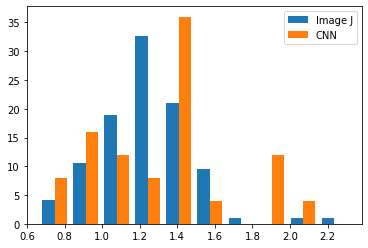

In [19]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


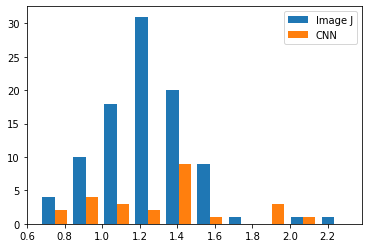

In [21]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [20]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1